
Group A: Anais, Andreea y Mar

Countries assigned:
    Argentina, Russia, Colombia, Chile and Spain


Option C

1. Document all steps. Structure your code to keep it cleaned using good practices.

DONE: 2. Collect Coronavirus Data. It is mandatory that in each call, it collects the last updated data.

MAR: 3. Determine and explain if the data is cleaned. If not, then clean it.

4. Create an API that returns a Json with the logic explained for your group. The flask server must be executed running the src/api/server.py file.
5. Get the jsons generated from your annexed group and plot it. First, try to connect to the private ip of your     annexed group. If it is not possible because of physical issues, then simply use what they generate copying it. If your annexed group cannot give you the necessary json, then annotate it, use the json of another group.

ANAIS: 6. Show different tendencies for each column in your dataset. Show, vertically, the start date and end date of the alarm state in each plot. If there is no alarm state, then show only the start date.

ANDREEA: 7. Draw the workflow of your program. You can use free tools.

8. Per country, which are the columns that are more related find the correlation between columns with the           correlation matrix.

DONE: 9. Use a different github repository adding all group participants with write permissions. Use that repository to manage the delivery code and resources. It is mandatory that every student of the group does, at least,five commits/push.

    10. Answer the questions:
        a. What position do your countries occupe respect to the number of total infected, total deaths and                 total recoveries?
        b. What can you conclude about your data study?
        c. Are there outliers or some rare data?



Our API must offer data to Group B and receive it from Group F, as follows:

    We have to offer a json(df):
    - Group A: it must return a json with one key “n_c_averages” that represents
    the mean of the “new_cases” per day of all of your countries.


    We should receive a json(df):
    - Group F: it must return a json with one key “n_t_averages” that represents the
    mean of the “new_tests” per day of all your countries.
    
Option B.... to be continued

In [2]:
#importamos librerias y funciones
import pandas as pd
import seaborn as sns
from utils.folders_tb import jsonlink_df
from utils.mining_data_tb import filter_df, df_covid, remove_outlier, datetime, data_complete_clean, data_paises_clean, group, sort_columns
from utils.visualization_tb import heatmap_df, detect_outliers_df, plot_clean_columns,remove_outlier_filtro,boxplots_per_country,heatmap_with_column_filters, position_countries

In [3]:
#Dataset total limpio 
covid_complete= data_complete_clean()
covid_complete

location  population  life_expectancy  data.date  data.total_cases  \
0      Afghanistan  38928341.0            64.83 2020-02-24               1.0   
1      Afghanistan  38928341.0            64.83 2020-02-25               1.0   
2      Afghanistan  38928341.0            64.83 2020-02-26               1.0   
3      Afghanistan  38928341.0            64.83 2020-02-27               1.0   
4      Afghanistan  38928341.0            64.83 2020-02-28               1.0   
...            ...         ...              ...        ...               ...   
60922     Zimbabwe  14862927.0            61.49 2021-01-16           26881.0   
60923     Zimbabwe  14862927.0            61.49 2021-01-17           27203.0   
60924     Zimbabwe  14862927.0            61.49 2021-01-18           27892.0   
60925     Zimbabwe  14862927.0            61.49 2021-01-19           28675.0   
60926     Zimbabwe  14862927.0            61.49 2021-01-20           29408.0   

       data.new_cases  data.total_cases_per_million  \
0                 1.0                         0.026   
1                 0.0                         0.026   
2                 0.0                         0.026   
3                 0.0                         0.026   
4                 0.0                         0.026   
...               ...                           ...   
60922           772.0                      1808.594   
60923           322.0                      1830.259   
60924           689.0                      1876.616   
60925           783.0                      1929.297   
60926           733.0                      1978.614   

       data.new_cases_per_million  data.stringency_index  \
0                           0.026                   8.33   
1                           0.000                   8.33   
2                           0.000                   8.33   
3                           0.000                   8.33   
4                           0.000                   8.33   
...                           ...                    ...   
60922                      51.941                  87.04   
60923                      21.665                  87.04   
60924                      46.357                    NaN   
60925                      52.681                    NaN   
60926                      49.317                    NaN   

       data.new_cases_smoothed  ...  data.reproduction_rate  data.total_tests  \
0                          NaN  ...                     NaN               NaN   
1                          NaN  ...                     NaN               NaN   
2                          NaN  ...                     NaN               NaN   
3                          NaN  ...                     NaN               NaN   
4                          NaN  ...                     NaN               NaN   
...                        ...  ...                     ...               ...   
60922                  911.714  ...                     NaN          270597.0   
60923                  818.000  ...                     NaN          272082.0   
60924                  799.286  ...                     NaN          275911.0   
60925                  776.571  ...                     NaN          280636.0   
60926                  736.000  ...                     NaN               NaN   

       data.total_tests_per_thousand  data.tests_units  \
0                                NaN               NaN   
1                                NaN               NaN   
2                                NaN               NaN   
3                                NaN               NaN   
4                                NaN               NaN   
...                              ...               ...   
60922                         18.206   tests performed   
60923                         18.306   tests performed   
60924                         18.564   tests performed   
60925                         18.882   tests performed   
60926                            NaN               NaN  

In [4]:
#Dataset limpio filtrado por nuestros paises
covid_paises= data_paises_clean()
covid_paises

location  population  life_expectancy  data.date  data.total_tests  \
0     Argentina  45195777.0            76.67 2020-01-01               4.0   
1     Argentina  45195777.0            76.67 2020-01-02              14.0   
2     Argentina  45195777.0            76.67 2020-01-03              19.0   
3     Argentina  45195777.0            76.67 2020-01-04              31.0   
4     Argentina  45195777.0            76.67 2020-01-05              41.0   
...         ...         ...              ...        ...               ...   
1746      Spain  46754783.0            83.56 2021-01-16               NaN   
1747      Spain  46754783.0            83.56 2021-01-17               NaN   
1748      Spain  46754783.0            83.56 2021-01-18               NaN   
1749      Spain  46754783.0            83.56 2021-01-19               NaN   
1750      Spain  46754783.0            83.56 2021-01-20               NaN   

      data.new_tests  data.total_tests_per_thousand  \
0                4.0                          0.000   
1               10.0                          0.000   
2                5.0                          0.000   
3               12.0                          0.001   
4               10.0                          0.001   
...              ...                            ...   
1746             NaN                            NaN   
1747             NaN                            NaN   
1748             NaN                            NaN   
1749             NaN                            NaN   
1750             NaN                            NaN   

      data.new_tests_per_thousand data.tests_units  data.stringency_index  \
0                             0.0    people tested                    0.0   
1                             0.0    people tested                    0.0   
2                             0.0    people tested                    0.0   
3                             0.0    people tested                    0.0   
4                             0.0    people tested                    0.0   
...                           ...              ...                    ...   
1746                          NaN              NaN                   71.3   
1747                          NaN              NaN                   71.3   
1748                          NaN              NaN                    NaN   
1749                          NaN              NaN                    NaN   
1750                          NaN              NaN                    NaN   

      ...  data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
0     ...                NaN              NaN                       NaN   
1     ...                NaN              NaN                       NaN   
2     ...                NaN              NaN                       NaN   
3     ...                NaN              NaN                       NaN   
4     ...                NaN              NaN                       NaN   
...   ...                ...              ...                       ...   
1746  ...            53314.0              0.0                   205.714   
1747  ...            53314.0              0.0                   205.714   
1748  ...            53769.0            455.0                   213.429   
1749  ...            54173.0            404.0                   212.857   
1750  ...            54637.0            464.0                   251.286   

      data.new_cases_smoothed_per_million  data.total_deaths_per_million  \
0                                     NaN                            NaN   
1                                     NaN                            NaN   
2                                     NaN                            NaN   
3                                     NaN                            NaN   
4                                     NaN                            NaN   
...                                   ...                            ...   
1746                              616.603                      

In [6]:
#Importamos el dataset actualizado
covid = jsonlink_df('https://covid.ourworldindata.org/data/owid-covid-data.json').T
covid

continent     location    population population_density median_age  \
AFG           Asia  Afghanistan    38928341.0             54.422       18.6   
ALB         Europe      Albania     2877800.0            104.871       38.0   
DZA         Africa      Algeria    43851043.0             17.348       29.1   
AND         Europe      Andorra       77265.0            163.755        NaN   
AGO         Africa       Angola    32866268.0             23.890       16.8   
...            ...          ...           ...                ...        ...   
VNM           Asia      Vietnam    97338583.0            308.127       32.6   
OWID_WRL       NaN        World  7794798729.0             58.045       30.9   
YEM           Asia        Yemen    29825968.0             53.508       20.3   
ZMB         Africa       Zambia    18383956.0             22.995       17.7   
ZWE         Africa     Zimbabwe    14862927.0             42.729       19.6   

         aged_65_older aged_70_older gdp_per_capita cardiovasc_death_rate  \
AFG              2.581         1.337       1803.987               597.029   
ALB             13.188         8.643      11803.431               304.195   
DZA              6.211         3.857      13913.839               278.364   
AND                NaN           NaN            NaN               109.135   
AGO              2.405         1.362       5819.495               276.045   
...                ...           ...            ...                   ...   
VNM              7.150         4.718       6171.884               245.465   
OWID_WRL         8.696         5.355      15469.207               233.070   
YEM              2.922         1.583       1479.147               495.003   
ZMB              2.480         1.542       3689.251               234.499   
ZWE              2.822         1.882       1899.775               307.846   

         diabetes_prevalence handwashing_facilities  \
AFG                     9.59                 37.746   
ALB                    10.08                    NaN   
DZA                     6.73                 83.741   
AND                     7.97                    NaN   
AGO                     3.94                 26.664   
...                      ...                    ...   
VNM                     6.00                 85.847   
OWID_WRL                8.51                 60.130   
YEM                     5.35                 49.542   
ZMB                     3.94                 13.938   
ZWE                     1.82                 36.791   

         hospital_beds_per_thousand life_expectancy human_development_index  \
AFG                           0.500           64.83                   0.498   
ALB                           2.890           78.57                   0.785   
DZA                           1.900           76.88                   0.754   
AND                             NaN           83.73                   0.858   
AGO                             NaN           61.15                   0.581   
...                             ...             ...                     ...   
VNM                           2.600           75.40                   0.694   
OWID_WRL                      2.705           72.58                     NaN   
YEM                           0.700           66.12                   0.452   
ZMB                           2.000           63.89                   0.588   
ZWE                           1.700           61.49                   0.535   

                                                       data extreme_poverty  \
AFG       [{'date': '2020-02-24', 'total_cases': 1.0, 'n...             NaN   
ALB       [{'date': '2020-03-09', 'total_cases': 2.0, 'n...             1.1   
DZA       [{'date': '2020-02-25', 'total_cases': 1.0, 'n...             0.5   
AND       [{'date': '2020-03-02', 'total_cases': 1.0, 'n...             NaN   
AGO       [{'date': '2020-03-20', 'total_cases': 1.0, 'n...             NaN   
...                                                

In [7]:
#Filtramos nuestros paises
covid=filter_df(covid,'location','Argentina','Russia', 'Colombia', 'Chile', 'Spain')
covid

continent   location   population population_density median_age  \
ARG  South America  Argentina   45195777.0             16.177       31.9   
CHL  South America      Chile   19116209.0             24.282       35.4   
COL  South America   Colombia   50882884.0             44.223       32.2   
RUS         Europe     Russia  145934460.0              8.823       39.6   
ESP         Europe      Spain   46754783.0             93.105       45.5   

    aged_65_older aged_70_older gdp_per_capita cardiovasc_death_rate  \
ARG        11.198         7.441      18933.907               191.032   
CHL        11.087         6.938      22767.037               127.993   
COL         7.646         4.312      13254.949               124.240   
RUS        14.178         9.393      24765.954               431.297   
ESP        19.436        13.799      34272.360                99.403   

    diabetes_prevalence handwashing_facilities hospital_beds_per_thousand  \
ARG                5.50                    NaN                       5.00   
CHL                8.46                    NaN                       2.11   
COL                7.44                 65.386                       1.71   
RUS                6.18                    NaN                       8.05   
ESP                7.17                    NaN                       2.97   

    life_expectancy human_development_index  \
ARG           76.67                   0.825   
CHL           80.18                   0.843   
COL           77.29                   0.747   
RUS           72.58                   0.816   
ESP           83.56                   0.891   

                                                  data extreme_poverty  \
ARG  [{'date': '2020-01-01', 'total_tests': 4.0, 'n...             0.6   
CHL  [{'date': '2020-02-23', 'total_cases': 2.0, 'n...             1.3   
COL  [{'date': '2020-03-06', 'total_cases': 1.0, 'n...             4.5   
RUS  [{'date': '2020-01-31', 'total_cases': 2.0, 'n...             0.1   
ESP  [{'date': '2020-02-01', 'total_cases': 1.0, 'n...             1.0   

    female_smokers male_smokers  
ARG           16.2         27.7  
CHL           34.2         41.5  
COL            4.7         13.5  
RUS           23.4         58.3  
ESP           27.4         31.4

In [8]:
#Extraemos la columna "data"
covid=df_covid(covid,val1="data")
covid

continent   location  population  population_density  median_age  \
0     South America  Argentina  45195777.0              16.177        31.9   
1     South America  Argentina  45195777.0              16.177        31.9   
2     South America  Argentina  45195777.0              16.177        31.9   
3     South America  Argentina  45195777.0              16.177        31.9   
4     South America  Argentina  45195777.0              16.177        31.9   
...             ...        ...         ...                 ...         ...   
1746         Europe      Spain  46754783.0              93.105        45.5   
1747         Europe      Spain  46754783.0              93.105        45.5   
1748         Europe      Spain  46754783.0              93.105        45.5   
1749         Europe      Spain  46754783.0              93.105        45.5   
1750         Europe      Spain  46754783.0              93.105        45.5   

      aged_65_older  aged_70_older  gdp_per_capita  cardiovasc_death_rate  \
0            11.198          7.441       18933.907                191.032   
1            11.198          7.441       18933.907                191.032   
2            11.198          7.441       18933.907                191.032   
3            11.198          7.441       18933.907                191.032   
4            11.198          7.441       18933.907                191.032   
...             ...            ...             ...                    ...   
1746         19.436         13.799       34272.360                 99.403   
1747         19.436         13.799       34272.360                 99.403   
1748         19.436         13.799       34272.360                 99.403   
1749         19.436         13.799       34272.360                 99.403   
1750         19.436         13.799       34272.360                 99.403   

      diabetes_prevalence  ...  data.new_vaccinations_smoothed_per_million  \
0                    5.50  ...                                         NaN   
1                    5.50  ...                                         NaN   
2                    5.50  ...                                         NaN   
3                    5.50  ...                                         NaN   
4                    5.50  ...                                         NaN   
...                   ...  ...                                         ...   
1746                 7.17  ...                                      1501.0   
1747                 7.17  ...                                      1502.0   
1748                 7.17  ...                                      1503.0   
1749                 7.17  ...                                      1460.0   
1750                 7.17  ...                                      1358.0   

      data.new_vaccinations  data.weekly_icu_admissions  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   
...                     ...                         ...   
1746                    NaN                         NaN   
1747                    NaN                         NaN   
1748                    NaN                         NaN   
1749                68155.0                         NaN   
1750                59840.0                         NaN   

      data.weekly_icu_admissions_per_million  data.weekly_hosp_admissions  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                                        NaN                          NaN   
...                                     

In [9]:
#Cambiamos la columna date a tipo datetime
covid= datetime(dt=covid, val1="data.date")
covid

continent   location  population  population_density  median_age  \
0     South America  Argentina  45195777.0              16.177        31.9   
1     South America  Argentina  45195777.0              16.177        31.9   
2     South America  Argentina  45195777.0              16.177        31.9   
3     South America  Argentina  45195777.0              16.177        31.9   
4     South America  Argentina  45195777.0              16.177        31.9   
...             ...        ...         ...                 ...         ...   
1746         Europe      Spain  46754783.0              93.105        45.5   
1747         Europe      Spain  46754783.0              93.105        45.5   
1748         Europe      Spain  46754783.0              93.105        45.5   
1749         Europe      Spain  46754783.0              93.105        45.5   
1750         Europe      Spain  46754783.0              93.105        45.5   

      aged_65_older  aged_70_older  gdp_per_capita  cardiovasc_death_rate  \
0            11.198          7.441       18933.907                191.032   
1            11.198          7.441       18933.907                191.032   
2            11.198          7.441       18933.907                191.032   
3            11.198          7.441       18933.907                191.032   
4            11.198          7.441       18933.907                191.032   
...             ...            ...             ...                    ...   
1746         19.436         13.799       34272.360                 99.403   
1747         19.436         13.799       34272.360                 99.403   
1748         19.436         13.799       34272.360                 99.403   
1749         19.436         13.799       34272.360                 99.403   
1750         19.436         13.799       34272.360                 99.403   

      diabetes_prevalence  ...  data.new_vaccinations_smoothed_per_million  \
0                    5.50  ...                                         NaN   
1                    5.50  ...                                         NaN   
2                    5.50  ...                                         NaN   
3                    5.50  ...                                         NaN   
4                    5.50  ...                                         NaN   
...                   ...  ...                                         ...   
1746                 7.17  ...                                      1501.0   
1747                 7.17  ...                                      1502.0   
1748                 7.17  ...                                      1503.0   
1749                 7.17  ...                                      1460.0   
1750                 7.17  ...                                      1358.0   

      data.new_vaccinations  data.weekly_icu_admissions  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   
...                     ...                         ...   
1746                    NaN                         NaN   
1747                    NaN                         NaN   
1748                    NaN                         NaN   
1749                68155.0                         NaN   
1750                59840.0                         NaN   

      data.weekly_icu_admissions_per_million  data.weekly_hosp_admissions  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                                        NaN                          NaN   
...                                     

In [10]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   continent                                   1751 non-null   object        
 1   location                                    1751 non-null   object        
 2   population                                  1751 non-null   float64       
 3   population_density                          1751 non-null   float64       
 4   median_age                                  1751 non-null   float64       
 5   aged_65_older                               1751 non-null   float64       
 6   aged_70_older                               1751 non-null   float64       
 7   gdp_per_capita                              1751 non-null   float64       
 8   cardiovasc_death_rate                       1751 non-null   float64       
 9   diabetes

In [11]:
#eliminamos columnas con muchos Nan
covid= covid.drop(["continent", "extreme_poverty", "human_development_index","hospital_beds_per_thousand", "diabetes_prevalence","female_smokers","cardiovasc_death_rate", "aged_70_older", "aged_65_older", "median_age", "population_density", "gdp_per_capita", "male_smokers","data.new_vaccinations","data.total_vaccinations_per_hundred","data.total_vaccinations","data.weekly_hosp_admissions_per_million","data.weekly_hosp_admissions","data.weekly_icu_admissions_per_million","data.weekly_icu_admissions","data.new_vaccinations_smoothed","data.new_vaccinations_smoothed_per_million","data.hosp_patients","data.hosp_patients_per_million","data.icu_patients","data.icu_patients_per_million","handwashing_facilities"],axis=1)
covid

location  population  life_expectancy  data.date  data.total_tests  \
0     Argentina  45195777.0            76.67 2020-01-01               4.0   
1     Argentina  45195777.0            76.67 2020-01-02              14.0   
2     Argentina  45195777.0            76.67 2020-01-03              19.0   
3     Argentina  45195777.0            76.67 2020-01-04              31.0   
4     Argentina  45195777.0            76.67 2020-01-05              41.0   
...         ...         ...              ...        ...               ...   
1746      Spain  46754783.0            83.56 2021-01-16               NaN   
1747      Spain  46754783.0            83.56 2021-01-17               NaN   
1748      Spain  46754783.0            83.56 2021-01-18               NaN   
1749      Spain  46754783.0            83.56 2021-01-19               NaN   
1750      Spain  46754783.0            83.56 2021-01-20               NaN   

      data.new_tests  data.total_tests_per_thousand  \
0                4.0                          0.000   
1               10.0                          0.000   
2                5.0                          0.000   
3               12.0                          0.001   
4               10.0                          0.001   
...              ...                            ...   
1746             NaN                            NaN   
1747             NaN                            NaN   
1748             NaN                            NaN   
1749             NaN                            NaN   
1750             NaN                            NaN   

      data.new_tests_per_thousand data.tests_units  data.stringency_index  \
0                             0.0    people tested                    0.0   
1                             0.0    people tested                    0.0   
2                             0.0    people tested                    0.0   
3                             0.0    people tested                    0.0   
4                             0.0    people tested                    0.0   
...                           ...              ...                    ...   
1746                          NaN              NaN                   71.3   
1747                          NaN              NaN                   71.3   
1748                          NaN              NaN                    NaN   
1749                          NaN              NaN                    NaN   
1750                          NaN              NaN                    NaN   

      ...  data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
0     ...                NaN              NaN                       NaN   
1     ...                NaN              NaN                       NaN   
2     ...                NaN              NaN                       NaN   
3     ...                NaN              NaN                       NaN   
4     ...                NaN              NaN                       NaN   
...   ...                ...              ...                       ...   
1746  ...            53314.0              0.0                   205.714   
1747  ...            53314.0              0.0                   205.714   
1748  ...            53769.0            455.0                   213.429   
1749  ...            54173.0            404.0                   212.857   
1750  ...            54637.0            464.0                   251.286   

      data.new_cases_smoothed_per_million  data.total_deaths_per_million  \
0                                     NaN                            NaN   
1                                     NaN                            NaN   
2                                     NaN                            NaN   
3                                     NaN                            NaN   
4                                     NaN                            NaN   
...                                   ...                            ...   
1746                              616.603                      

In [12]:
covid.isna().sum().sort_values(ascending=False)

data.new_tests                          584
data.new_tests_per_thousand             584
data.total_tests                        531
data.total_tests_per_thousand           531
data.tests_per_case                     349
data.positive_rate                      349
data.new_tests_smoothed                 287
data.new_tests_smoothed_per_thousand    287
data.reproduction_rate                  253
data.tests_units                        252
data.new_deaths_per_million             190
data.total_deaths_per_million           190
data.total_deaths                       190
data.new_deaths                         190
data.new_cases_smoothed_per_million      87
data.new_deaths_smoothed                 87
data.new_cases_smoothed                  87
data.new_deaths_smoothed_per_million     87
data.new_cases                           62
data.new_cases_per_million               62
data.total_cases_per_million             62
data.total_cases                         62
data.stringency_index           

In [13]:
covid.describe()

population  life_expectancy  data.total_tests  data.new_tests  \
count  1.751000e+03      1751.000000      1.220000e+03     1167.000000   
mean   6.207612e+07        78.016522      1.144897e+07    95732.397601   
std    4.376287e+07         3.692387      2.155404e+07   148905.575250   
min    1.911621e+07        72.580000      4.000000e+00        1.000000   
25%    4.519578e+07        76.670000      7.705005e+05    15361.500000   
50%    4.675478e+07        77.290000      3.030412e+06    26620.000000   
75%    5.088288e+07        80.180000      6.263262e+06    49942.000000   
max    1.459345e+08        83.560000      9.764179e+07   648370.000000   

       data.total_tests_per_thousand  data.new_tests_per_thousand  \
count                    1220.000000                  1167.000000   
mean                      127.126018                     1.073453   
std                       152.457357                     0.979591   
min                         0.000000                     0.000000   
25%                        17.812750                     0.394000   
50%                        70.710000                     0.673000   
75%                       177.721750                     1.711000   
max                       669.080000                     4.443000   

       data.stringency_index  data.new_tests_smoothed  \
count            1739.000000              1464.000000   
mean               67.352059             94102.000683   
std                24.186873            134501.008824   
min                 0.000000                 0.000000   
25%                60.190000             17954.000000   
50%                74.540000             30375.000000   
75%                85.190000            113649.000000   
max               100.000000            565313.000000   

       data.new_tests_smoothed_per_thousand  data.total_cases  ...  \
count                           1464.000000      1.689000e+03  ...   
mean                               1.201359      6.335706e+05  ...   
std                                1.018608      7.097546e+05  ...   
min                                0.000000      1.000000e+00  ...   
25%                                0.470000      4.368200e+04  ...   
50%                                0.788000      3.976230e+05  ...   
75%                                1.871000      9.874700e+05  ...   
max                                3.956000      3.595136e+06  ...   

       data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
count        1561.000000      1561.000000               1664.000000   
mean        18515.519539       150.194106                138.196694   
std         16165.624860       193.591723                152.165702   
min             1.000000     -1918.000000               -232.143000   
25%          2491.000000        19.000000                 16.821250   
50%         15138.000000        98.000000                105.286000   
75%         29418.000000       212.000000                186.606750   
max         66214.000000      3351.000000                865.714000   

       data.new_cases_smoothed_per_million  data.total_deaths_per_million  \
count                          1664.000000                    1561.000000   
mean                            111.558575                     388.984381   
std                             103.237984                     337.766841   
min                               0.000000                       0.007000   
25%                              24.356250                      43.964000   
50%                              88.873500                     343.904000   
75%                             174.832500                     660.981000   
max                             721.787000                    1168.586000   

       data.new_deaths_per_million  data.new_deaths_smoothed_per_million  \
count                  1561.000000                           1664.000000   
mean                      2.910828                              2.685590   
std          

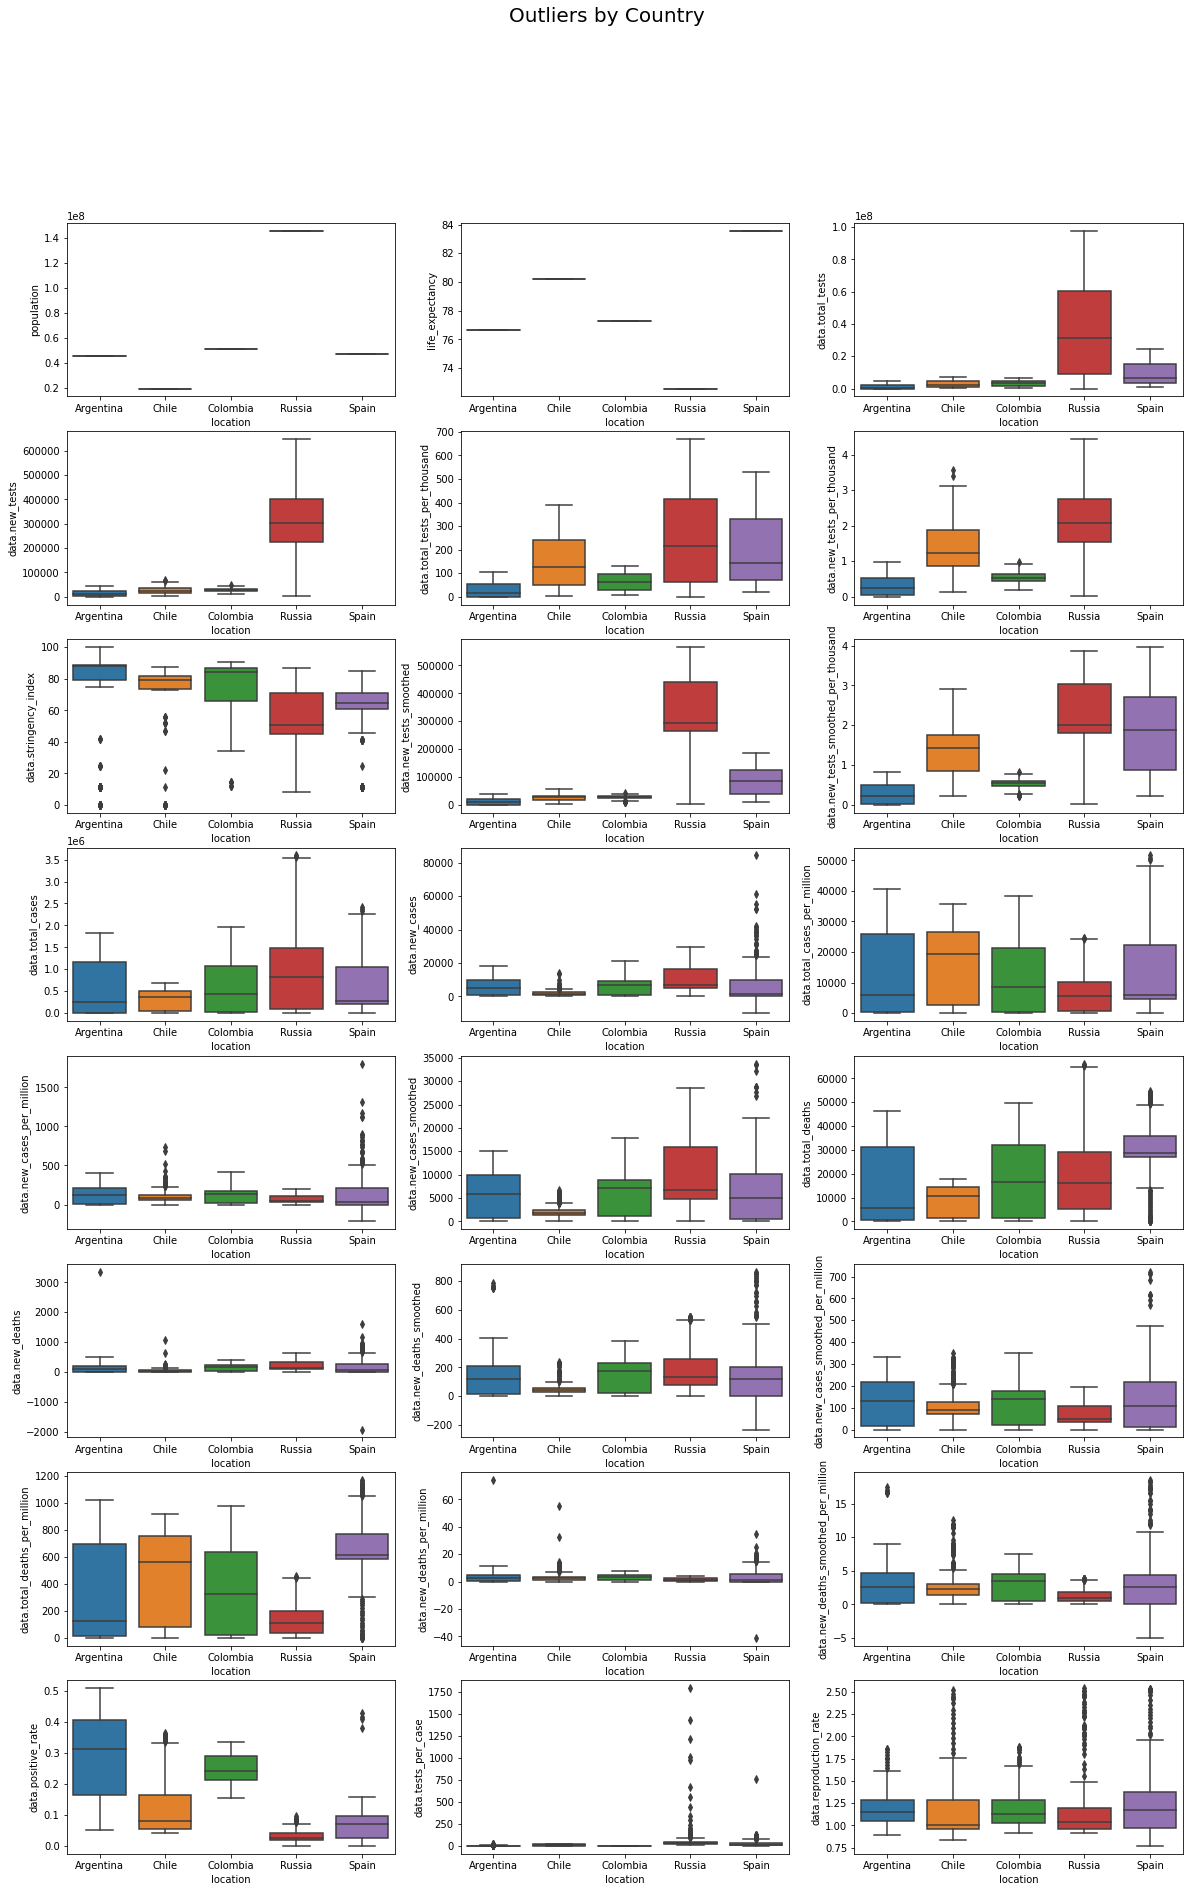

In [14]:
# check for outliers
boxplots_per_country(df=covid,file_name='_initial')

In [15]:
#Argentina, Russia, Colombia, Chile and Spain
#Outliers detectados en: 'data.new_tests_per_thousand', 'data.stringency_index','data.new_cases','data.new_cases_per_million','data.new_deaths','data.new_deaths_smoothed','data.new_deaths_per_million','data.new_deaths_smoothed_per_million','data.positive_rate','data.tests_per_case'

#'data.new_tests_per_thousand', Chile 
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Chile'],df_in=covid[covid['location']=='Chile'],col_name='data.new_tests_per_thousand')

#'data.stringency_index', Argentina, Colombia, Chile and Spain
covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Argentina'],df_in=covid[covid['location']=='Argentina'],col_name='data.stringency_index')
covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Colombia'],df_in=covid[covid['location']=='Colombia'],col_name='data.stringency_index')
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Chile'],df_in=covid[covid['location']=='Chile'],col_name='data.stringency_index')
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Spain'],df_in=covid[covid['location']=='Spain'],col_name='data.stringency_index')

#'data.new_cases', Spain, Colombia, Chile
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Spain'],df_in=covid[covid['location']=='Spain'],col_name='data.new_cases')
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Chile'],df_in=covid[covid['location']=='Chile'],col_name='data.new_cases')
covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Colombia'],df_in=covid[covid['location']=='Colombia'],col_name='data.new_cases')

# 'data.new_cases_per_million', Spain, Colombia, Chile
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Spain'],df_in=covid[covid['location']=='Spain'],col_name='data.new_cases_per_million')
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Chile'],df_in=covid[covid['location']=='Chile'],col_name='data.new_cases_per_million')
covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Colombia'],df_in=covid[covid['location']=='Colombia'],col_name='data.new_cases_per_million')

# ,'data.new_deaths',Argentina, Chile, Spain
covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Argentina'],df_in=covid[covid['location']=='Argentina'],col_name='data.new_deaths')
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Spain'],df_in=covid[covid['location']=='Spain'],col_name='data.new_deaths')
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Chile'],df_in=covid[covid['location']=='Chile'],col_name='data.new_deaths')

# 'data.new_deaths_smoothed',Argentina, Chile
covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Argentina'],df_in=covid[covid['location']=='Argentina'],col_name='data.new_deaths_smoothed')
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Chile'],df_in=covid[covid['location']=='Chile'],col_name='data.new_deaths_smoothed')

# 'data.new_deaths_per_million', Argentina, Chile, Spain
covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Argentina'],df_in=covid[covid['location']=='Argentina'],col_name='data.new_deaths_per_million')
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Spain'],df_in=covid[covid['location']=='Spain'],col_name='data.new_deaths_per_million')
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Chile'],df_in=covid[covid['location']=='Chile'],col_name='data.new_deaths_per_million')

# 'data.new_deaths_smoothed_per_million',Argentina, Chile
covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Argentina'],df_in=covid[covid['location']=='Argentina'],col_name='data.new_deaths_smoothed_per_million')
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Chile'],df_in=covid[covid['location']=='Chile'],col_name='data.new_deaths_smoothed_per_million')

# 'data.positive_rate', Spain, Chile
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Spain'],df_in=covid[covid['location']=='Spain'],col_name='data.positive_rate')
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Chile'],df_in=covid[covid['location']=='Chile'],col_name='data.new_deaths_per_million')

# 'data.tests_per_case',Spain, Russia
#covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Spain'],df_in=covid[covid['location']=='Spain'],col_name='data.tests_per_case')
covid=remove_outlier_filtro(df_inicial=covid[covid['location']!='Russia'],df_in=covid[covid['location']=='Russia'],col_name='data.tests_per_case')

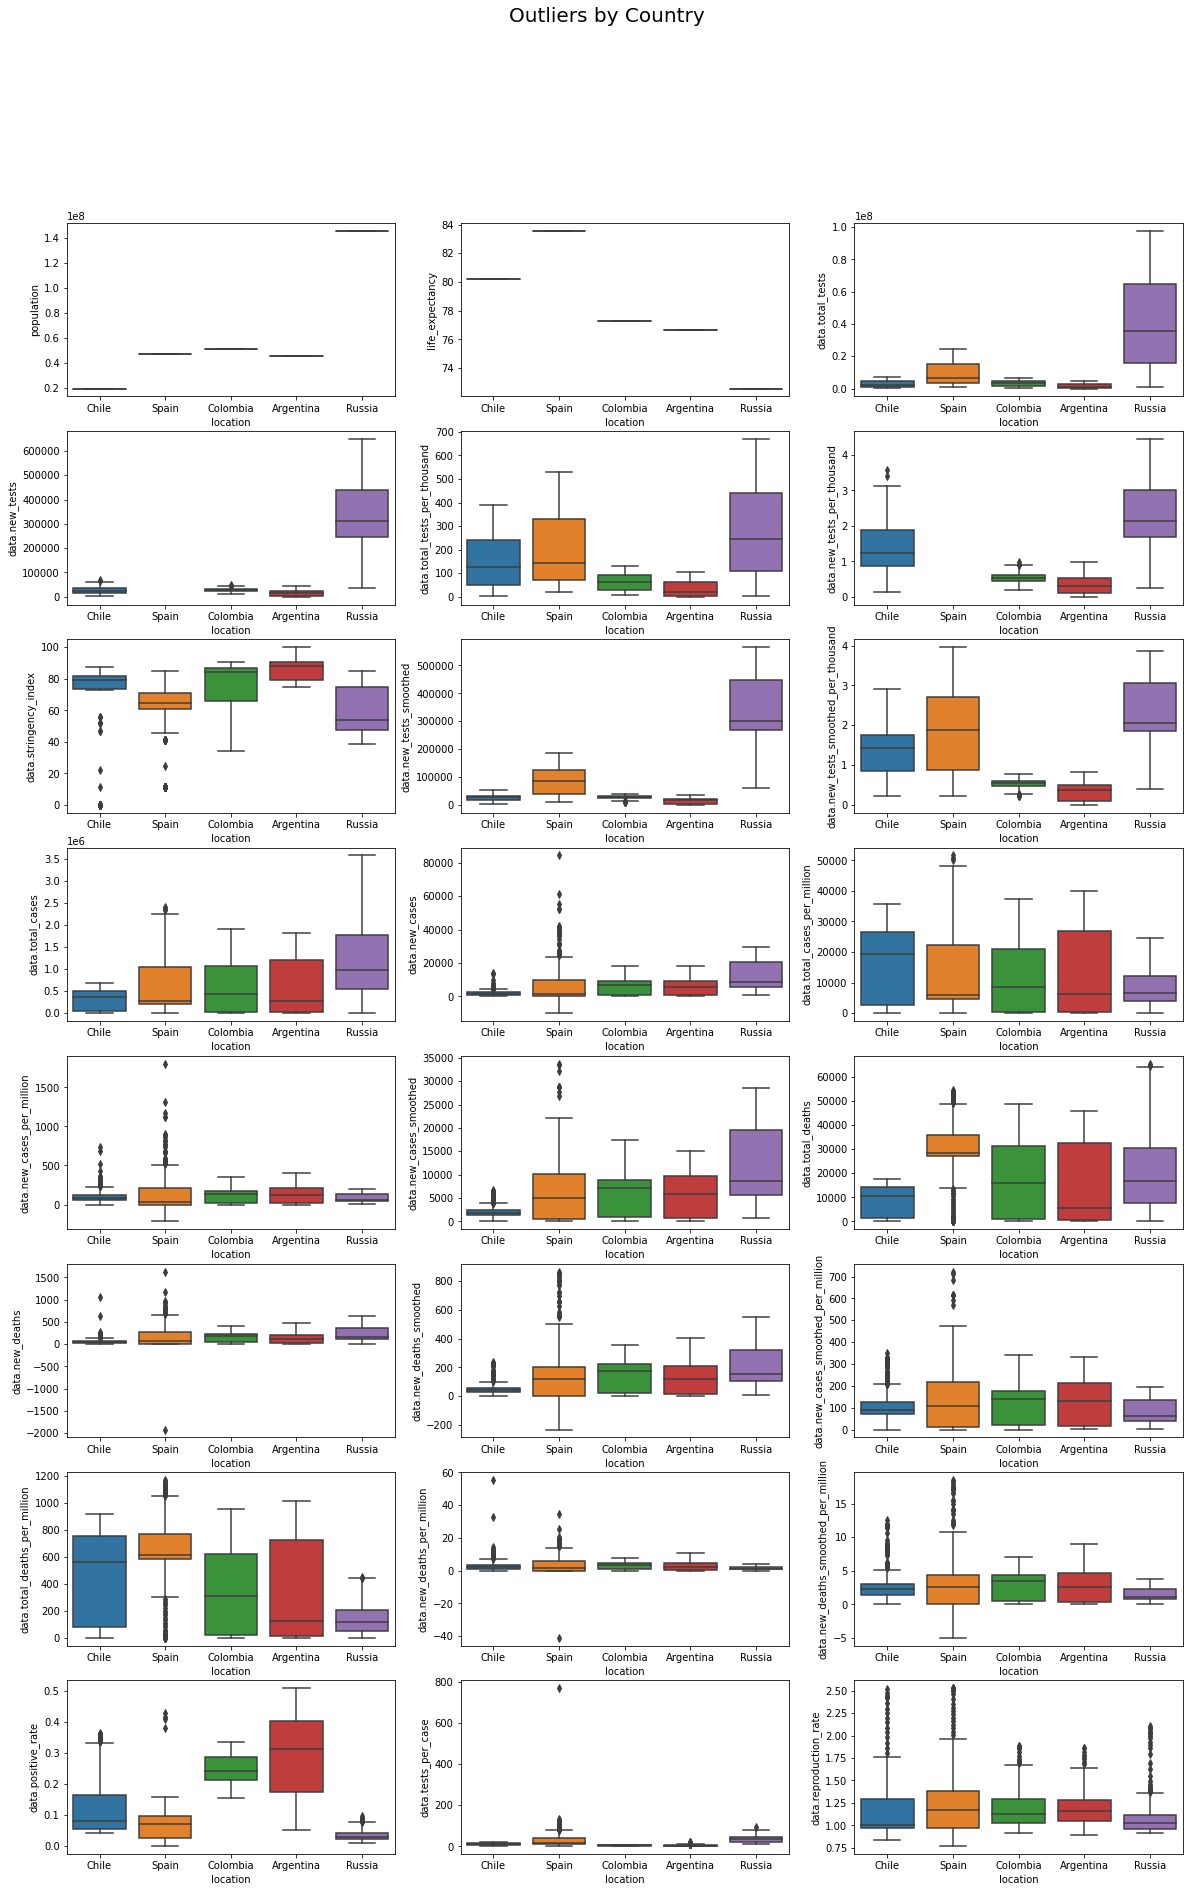

In [16]:
boxplots_per_country(df=covid,file_name='_cleaned')

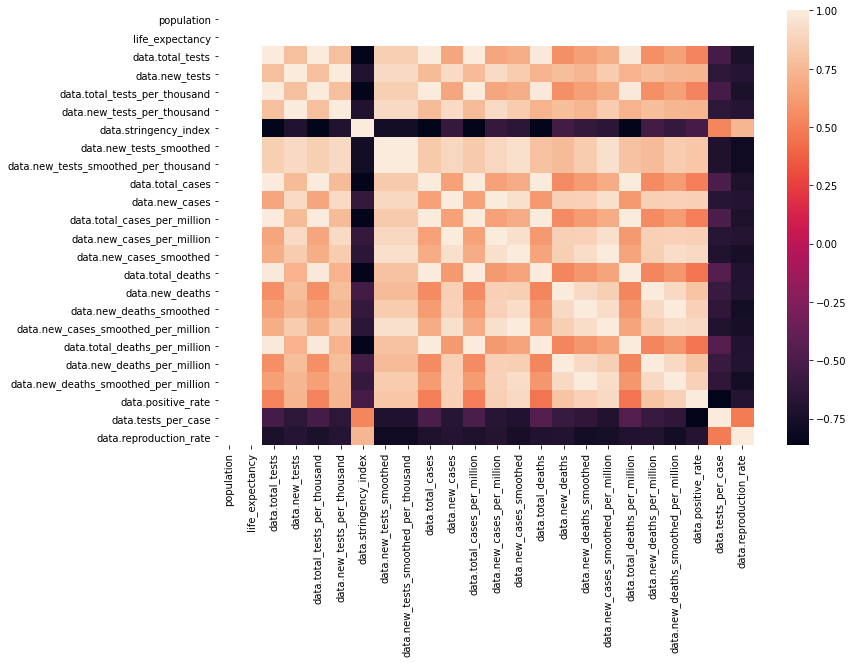

In [17]:
#matrix de correlación entre nuestras columnas, desglosadas por pais
heatmap_df(covid[covid['location']=='Argentina'], file_name='Heatmap_Argentina')

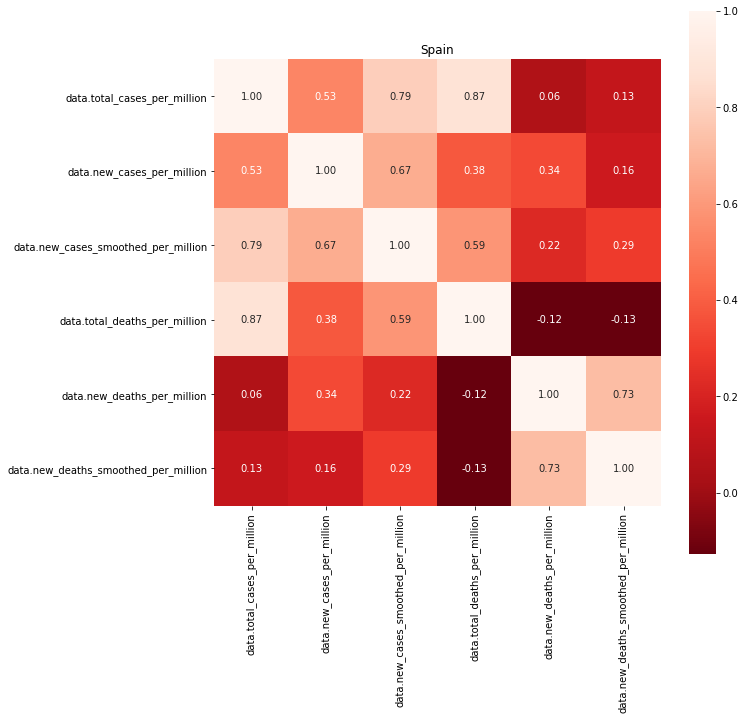

In [18]:
# mostrar la matriz de correlacion por cada pais: Argentina, Russia, Colombia, Chile and Spain
heatmap_with_column_filters(covid,'location','Spain', 
 'data.total_cases_per_million',
 'data.new_cases_per_million',
 'data.new_cases_smoothed_per_million',
 'data.total_deaths_per_million',
 'data.new_deaths_per_million',
 'data.new_deaths_smoothed_per_million',
)

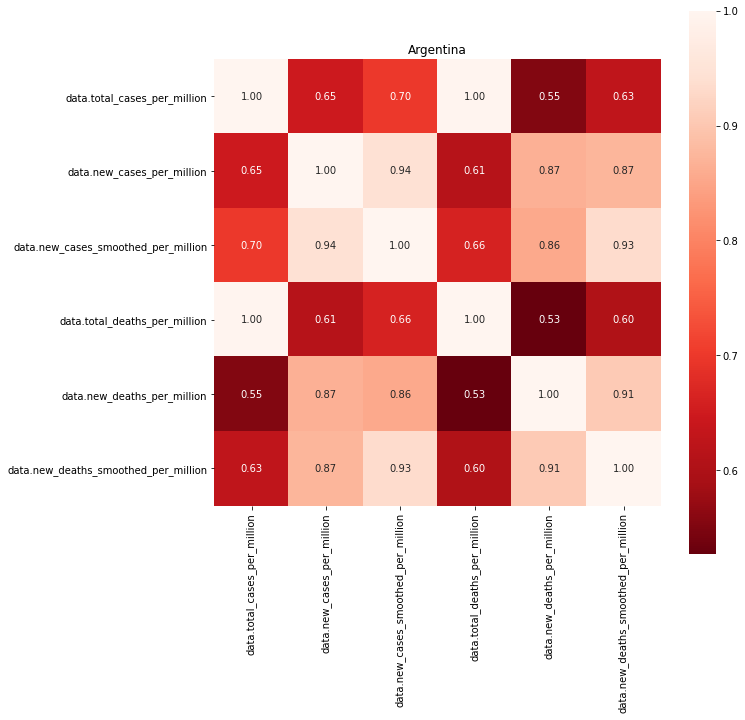

In [19]:
# mostrar la matriz de correlacion por cada pais: Argentina, Russia, Colombia, Chile and Spain
heatmap_with_column_filters(covid,'location','Argentina', 
'data.total_cases_per_million',
 'data.new_cases_per_million',
 'data.new_cases_smoothed_per_million',
 'data.total_deaths_per_million',
 'data.new_deaths_per_million',
 'data.new_deaths_smoothed_per_million',
)

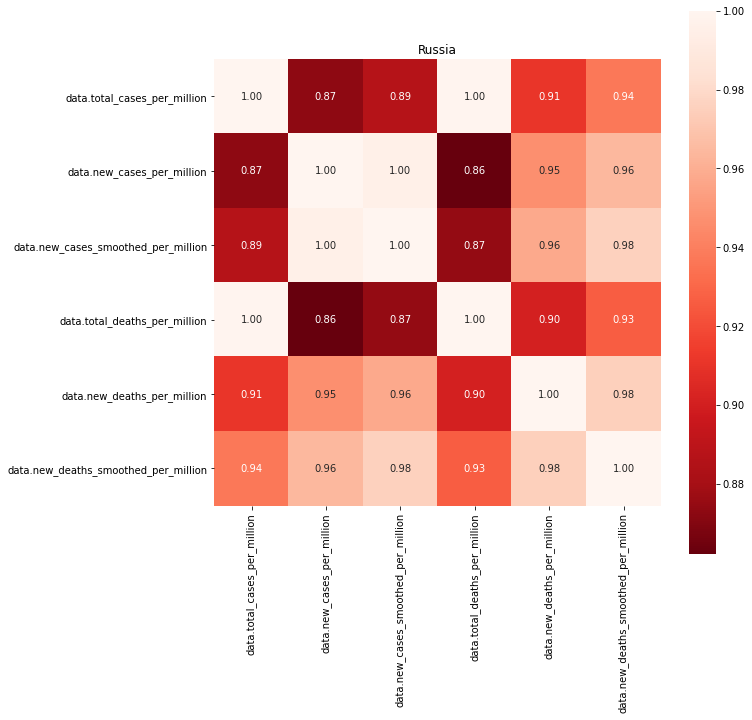

In [20]:
# mostrar la matriz de correlacion por cada pais:  Russia, Colombia, Chile and Spain
heatmap_with_column_filters(covid,'location','Russia',
 'data.total_cases_per_million',
 'data.new_cases_per_million',
 'data.new_cases_smoothed_per_million',
 'data.total_deaths_per_million',
 'data.new_deaths_per_million', 
 'data.new_deaths_smoothed_per_million'
)

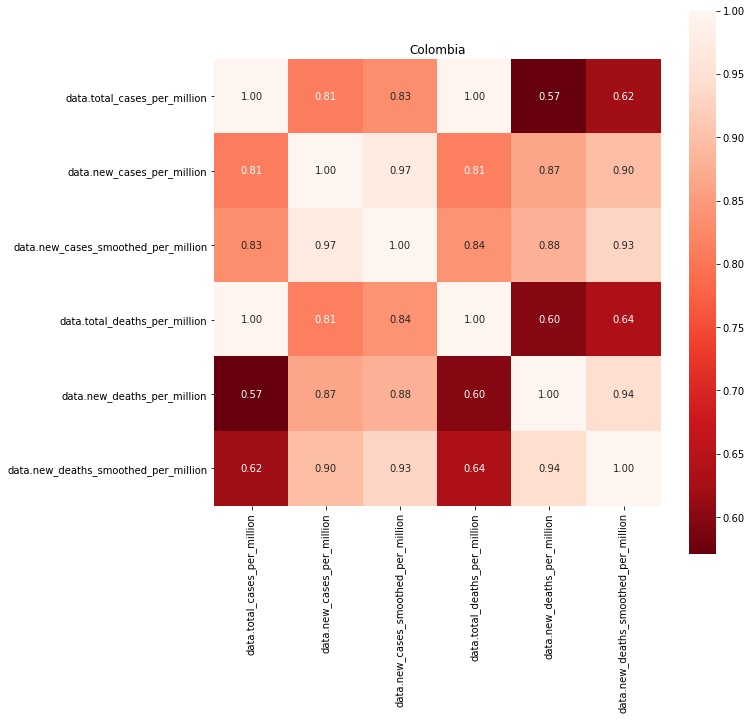

In [21]:
# mostrar la matriz de correlacion por cada pais:  Russia, Colombia, Chile and Spain
heatmap_with_column_filters(covid,'location','Colombia',
 'data.total_cases_per_million',
 'data.new_cases_per_million',
 'data.new_cases_smoothed_per_million',
 'data.total_deaths_per_million',
 'data.new_deaths_per_million', 
 'data.new_deaths_smoothed_per_million'
)

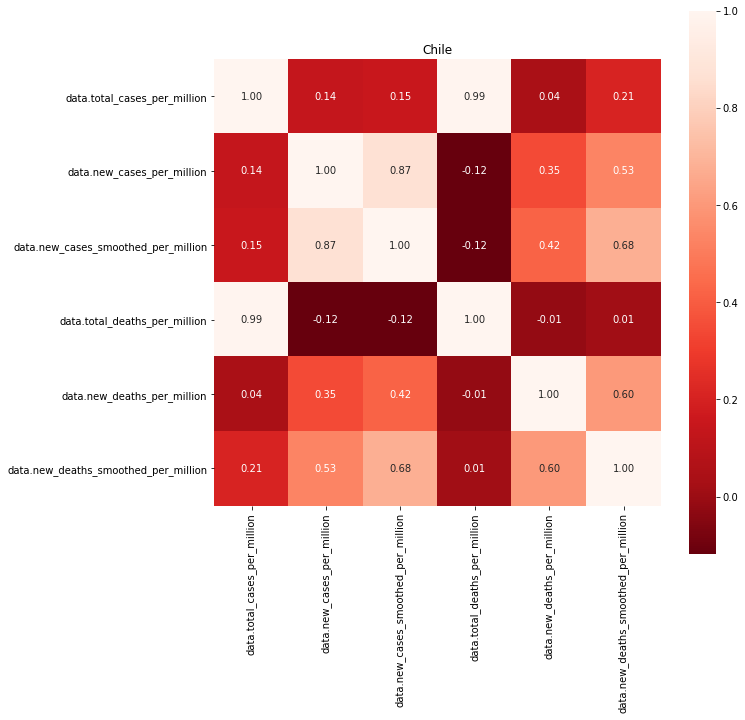

In [22]:
# mostrar la matriz de correlacion por cada pais: Argentina, Russia, Colombia, Chile and Spain


heatmap_with_column_filters(covid,'location','Chile', 
'data.total_cases_per_million',
 'data.new_cases_per_million',
 'data.new_cases_smoothed_per_million',
 'data.total_deaths_per_million',
 'data.new_deaths_per_million',
 'data.new_deaths_smoothed_per_million',

)

In [23]:
covid.isna().sum().sort_values(ascending=False)

data.new_tests                          502
data.new_tests_per_thousand             502
data.total_tests                        453
data.total_tests_per_thousand           453
data.tests_per_case                     232
data.positive_rate                      232
data.new_tests_smoothed                 230
data.new_tests_smoothed_per_thousand    230
data.tests_units                        209
data.reproduction_rate                  114
data.new_deaths_per_million              69
data.total_deaths                        69
data.total_deaths_per_million            69
data.new_deaths                          69
data.new_deaths_smoothed_per_million     10
data.new_cases_smoothed_per_million      10
data.new_cases_smoothed                  10
data.new_deaths_smoothed                 10
data.stringency_index                     6
location                                  0
data.new_cases_per_million                0
data.total_cases_per_million              0
population                      

In [24]:
covid.set_index('data.date', inplace=True)
covid

location   population  life_expectancy  data.total_tests  \
data.date                                                             
2020-02-23    Chile   19116209.0            80.18               NaN   
2020-02-24    Chile   19116209.0            80.18               NaN   
2020-02-25    Chile   19116209.0            80.18               NaN   
2020-02-26    Chile   19116209.0            80.18               NaN   
2020-02-27    Chile   19116209.0            80.18               NaN   
...             ...          ...              ...               ...   
2021-01-15   Russia  145934460.0            72.58        96211226.0   
2021-01-16   Russia  145934460.0            72.58        96690043.0   
2021-01-17   Russia  145934460.0            72.58        97063166.0   
2021-01-18   Russia  145934460.0            72.58        97321075.0   
2021-01-19   Russia  145934460.0            72.58        97641786.0   

            data.new_tests  data.total_tests_per_thousand  \
data.date                                                   
2020-02-23             NaN                            NaN   
2020-02-24             NaN                            NaN   
2020-02-25             NaN                            NaN   
2020-02-26             NaN                            NaN   
2020-02-27             NaN                            NaN   
...                    ...                            ...   
2021-01-15        583820.0                        659.277   
2021-01-16        478817.0                        662.558   
2021-01-17        373123.0                        665.115   
2021-01-18        257909.0                        666.882   
2021-01-19        320711.0                        669.080   

            data.new_tests_per_thousand data.tests_units  \
data.date                                                  
2020-02-23                          NaN              NaN   
2020-02-24                          NaN              NaN   
2020-02-25                          NaN              NaN   
2020-02-26                          NaN              NaN   
2020-02-27                          NaN              NaN   
...                                 ...              ...   
2021-01-15                        4.001  tests performed   
2021-01-16                        3.281  tests performed   
2021-01-17                        2.557  tests performed   
2021-01-18                        1.767  tests performed   
2021-01-19                        2.198  tests performed   

            data.stringency_index  data.new_tests_smoothed  ...  \
data.date                                                   ...   
2020-02-23                   0.00                      NaN  ...   
2020-02-24                   0.00                      NaN  ...   
2020-02-25                   0.00                      NaN  ...   
2020-02-26                   0.00                      NaN  ...   
2020-02-27                   0.00                      NaN  ...   
...                           ...                      ...  ...   
2021-01-15                  50.46                 424810.0  ...   
2021-01-16                  50.46                 444297.0  ...   
2021-01-17                  50.46                 442793.0  ...   
2021-01-18                  50.46                 433015.0  ...   
2021-01-19                  50.46                 430062.0  ...   

            data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
data.date                                                                  
2020-02-23                NaN              NaN                       NaN   
2020-02-24                NaN              NaN                       NaN   
2020-02-25                NaN              NaN                       NaN   
2020-02-26                NaN              NaN                       NaN   
2020-02-27                NaN              NaN                       NaN   
...                       ...              ...                       ...   
2021-01-15            63558.0   

location                  5
data.stringency_index    61
dtype: int64
------
Spain        352
Colombia     310
Chile        310
Argentina    298
Russia       288
Name: location, dtype: int64
------
------


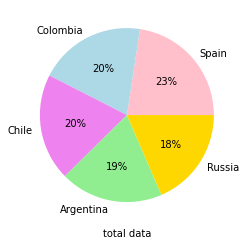

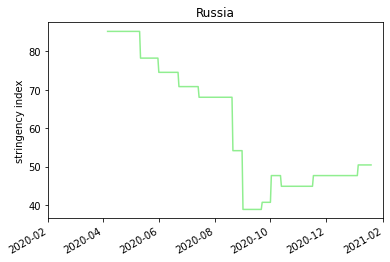

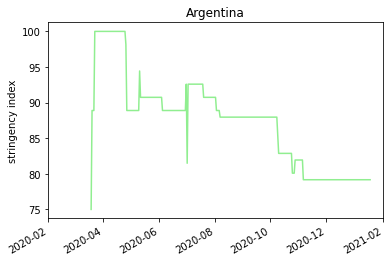

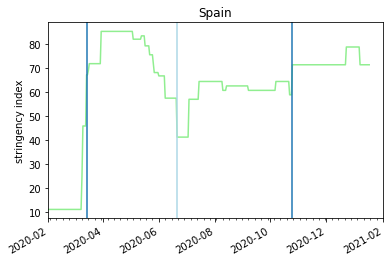

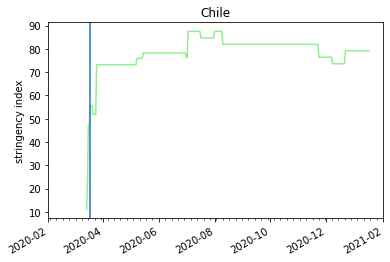

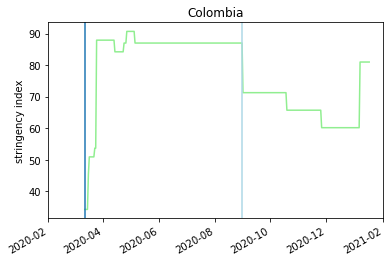

In [25]:
plot_clean_columns(df_name=covid, df_column='data.stringency_index', y_label='stringency index')

location                         5
data.new_cases_per_million    1437
dtype: int64
------
Chile        320
Colombia     309
Argentina    293
Russia       288
Spain        266
Name: location, dtype: int64
------
------


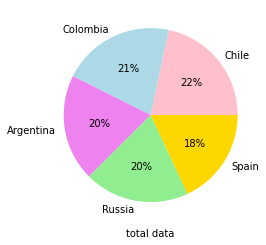

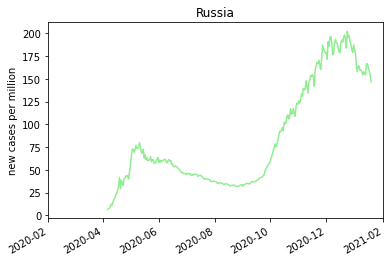

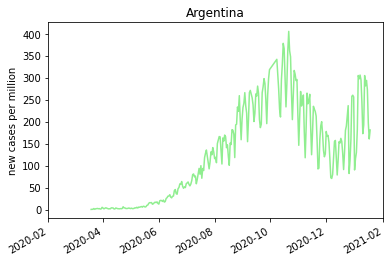

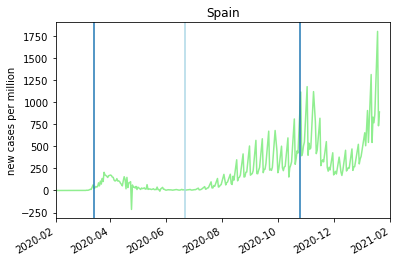

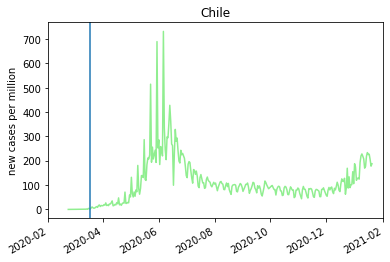

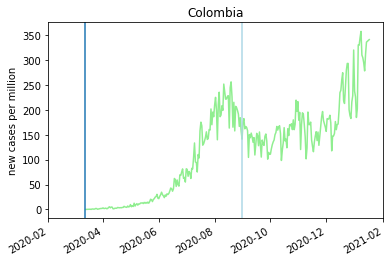

In [26]:
plot_clean_columns(df_name=covid, df_column='data.new_cases_per_million', y_label='new cases per million')

location                           5
data.total_cases_per_million    1477
dtype: int64
------
Spain        355
Chile        333
Colombia     310
Argentina    298
Russia       288
Name: location, dtype: int64
------
------


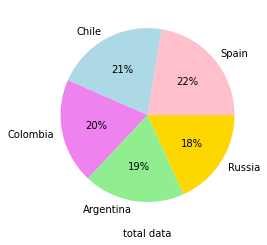

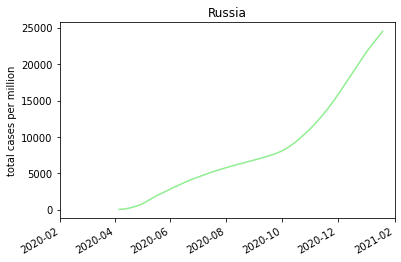

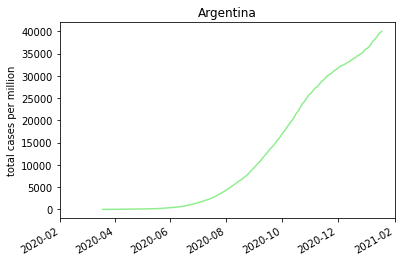

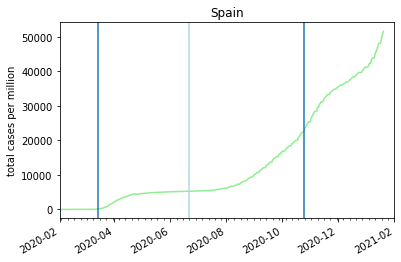

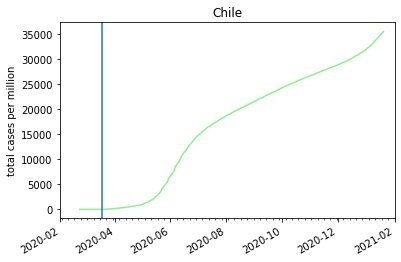

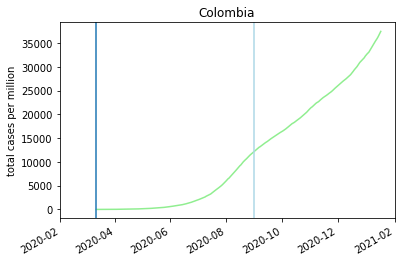

In [27]:
plot_clean_columns(df_name=covid, df_column='data.total_cases_per_million', y_label='total cases per million')

location                            5
data.total_deaths_per_million    1420
dtype: int64
------
Spain        324
Chile        305
Colombia     300
Argentina    298
Russia       288
Name: location, dtype: int64
------
------


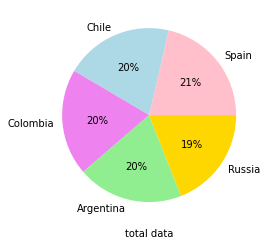

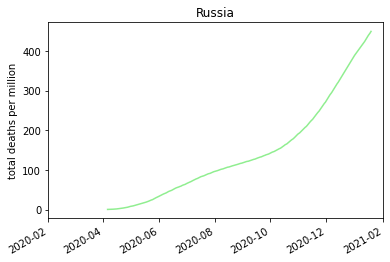

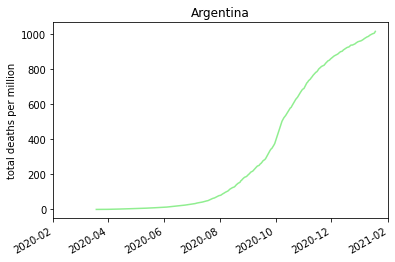

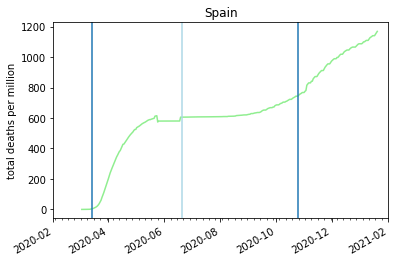

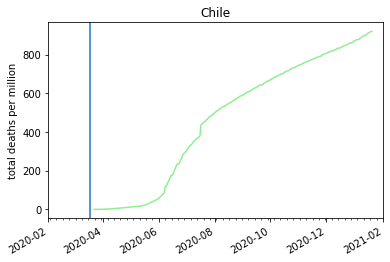

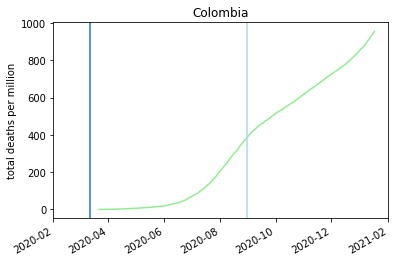

In [28]:
plot_clean_columns(df_name=covid, df_column='data.total_deaths_per_million', y_label='total deaths per million')

location                         5
data.new_deaths_per_million    813
dtype: int64
------
Chile        302
Argentina    294
Colombia     293
Russia       288
Spain        244
Name: location, dtype: int64
------
------


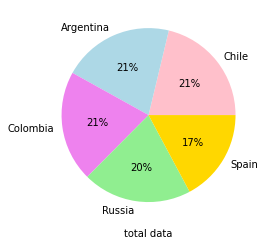

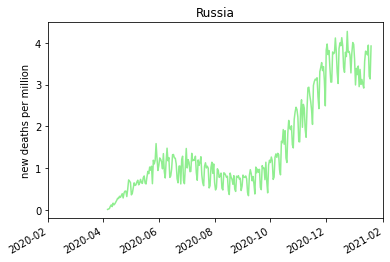

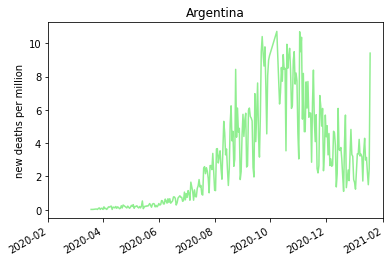

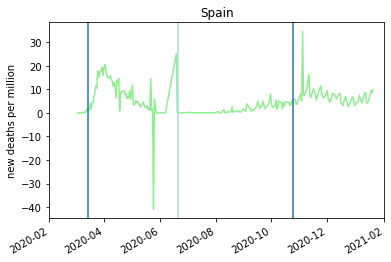

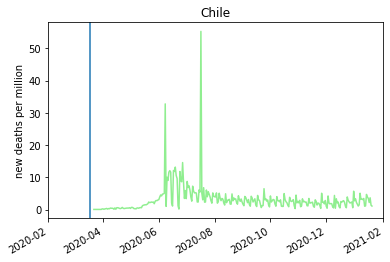

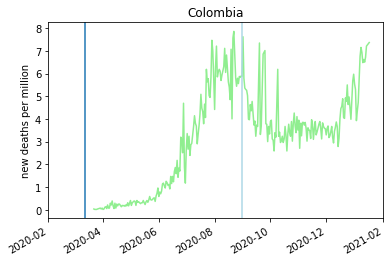

In [29]:
plot_clean_columns(df_name=covid, df_column='data.new_deaths_per_million', y_label='new deaths per million')

location                    5
data.reproduction_rate    139
dtype: int64
------
Spain        312
Chile        299
Colombia     296
Argentina    286
Russia       277
Name: location, dtype: int64
------
------


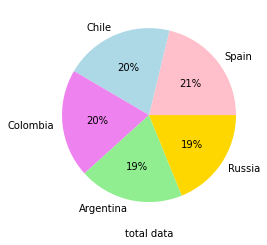

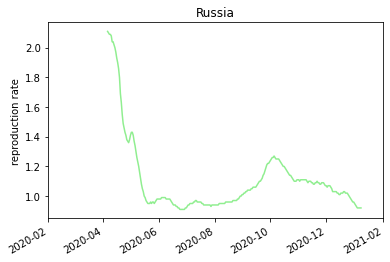

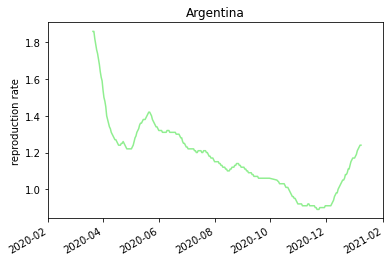

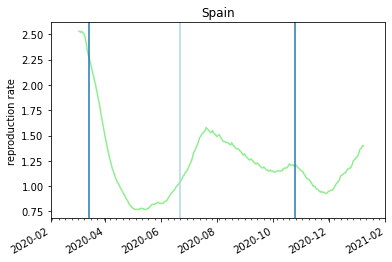

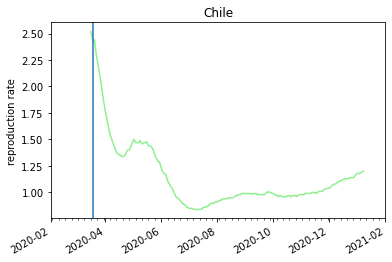

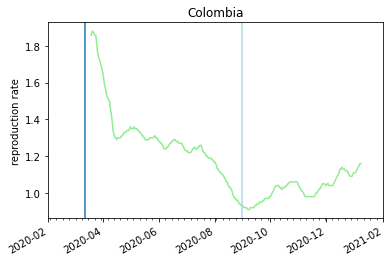

In [30]:
plot_clean_columns(df_name=covid, df_column='data.reproduction_rate', y_label='reproduction rate')

location                5
data.positive_rate    384
dtype: int64
------
Argentina    294
Russia       288
Chile        282
Spain        270
Colombia     218
Name: location, dtype: int64
------
------


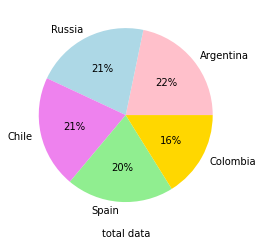

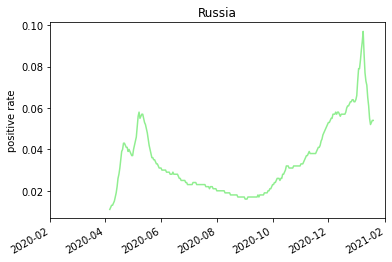

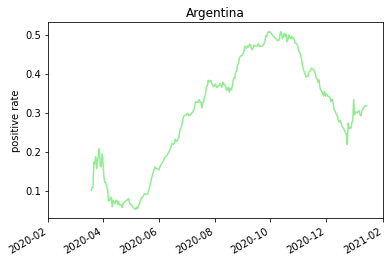

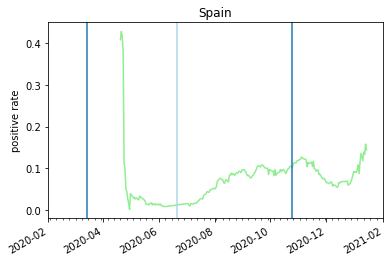

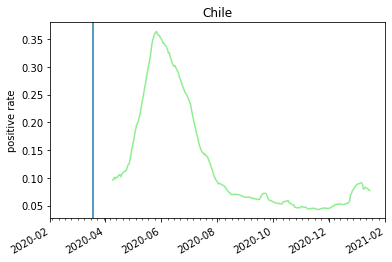

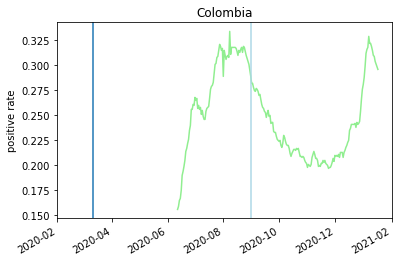

In [31]:
plot_clean_columns(df_name=covid, df_column='data.positive_rate', y_label='positive rate')

location                 5
data.tests_per_case    421
dtype: int64
------
Argentina    294
Russia       288
Chile        282
Spain        270
Colombia     218
Name: location, dtype: int64
------
------


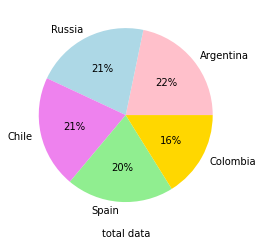

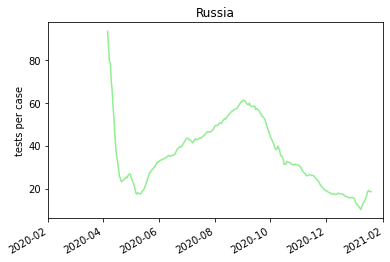

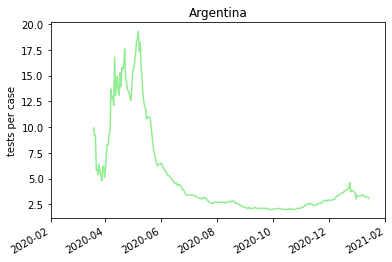

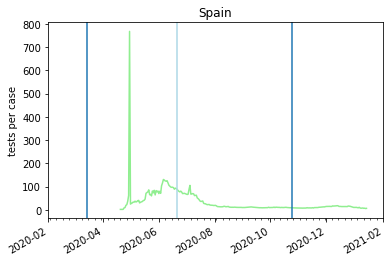

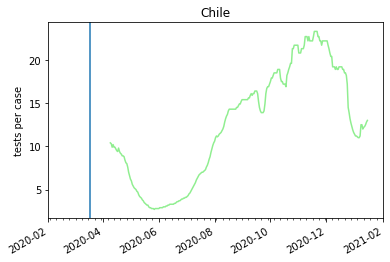

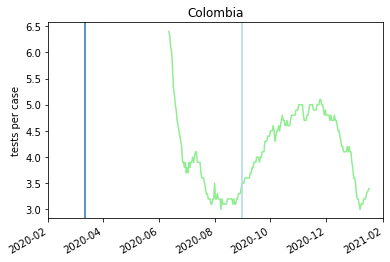

In [32]:
plot_clean_columns(df_name=covid, df_column='data.tests_per_case', y_label='tests per case')

location               5
data.total_tests    1131
dtype: int64
------
Argentina    294
Chile        287
Russia       282
Colombia     228
Spain         40
Name: location, dtype: int64
------
------


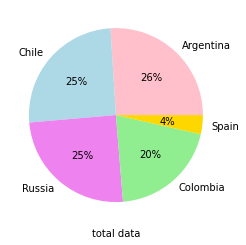

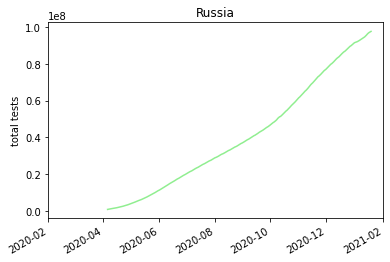

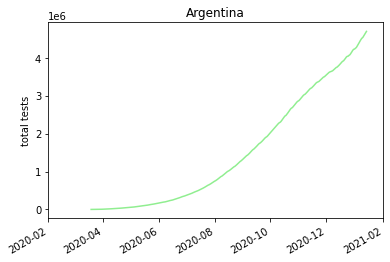

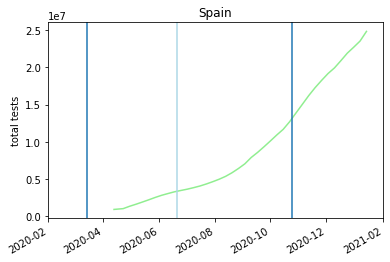

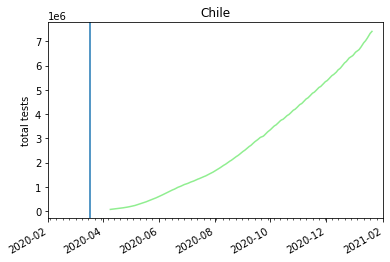

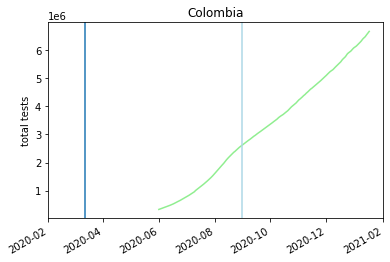

In [33]:
plot_clean_columns(df_name=covid, df_column='data.total_tests', y_label='total tests')

location             4
data.new_tests    1081
dtype: int64
------
Argentina    294
Chile        286
Russia       276
Colombia     226
Name: location, dtype: int64
------
------


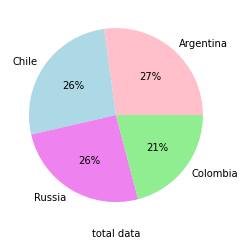

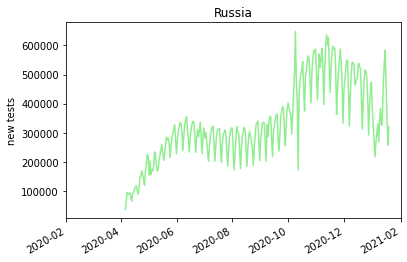

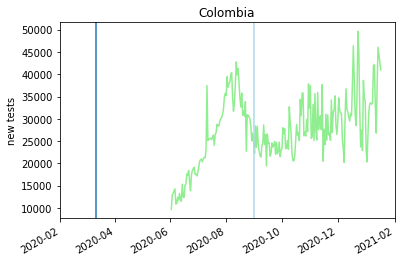

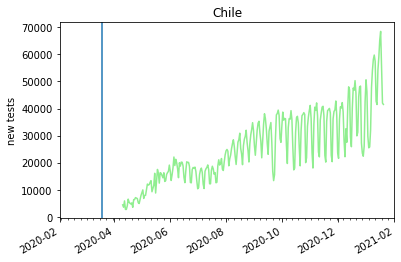

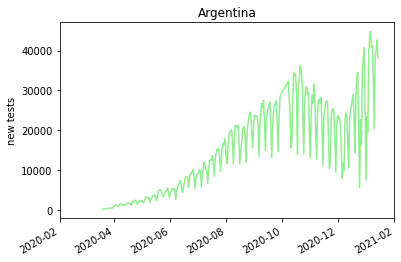

In [34]:
plot_clean_columns(df_name=covid, df_column='data.new_tests', y_label='new tests')

In [5]:
#Posición de nuestros paises respecto al total de paises
position_countries_covid = group(dt=data_complete_clean(), col1="location", col2="data.total_cases_per_million",col3= "data.total_deaths_per_million", col4="life_expectancy")
position_countries_covid

data.total_cases_per_million  data.total_deaths_per_million  \
location                                                                   
Afghanistan                    739.038190                      28.881856   
Albania                       5467.105384                     124.456646   
Algeria                        870.044707                      31.415803   
Andorra                      34081.189074                     730.931272   
Angola                         169.367147                       4.619128   
...                                   ...                            ...   
Vietnam                          7.046357                       0.331460   
World                         3320.187403                      92.169849   
Yemen                           49.756993                      15.272195   
Zambia                         531.387790                      11.575276   
Zimbabwe                       388.477016                      10.576658   

             life_expectancy  
location                      
Afghanistan            64.83  
Albania                78.57  
Algeria                76.88  
Andorra                83.73  
Angola                 61.15  
...                      ...  
Vietnam                75.40  
World                  72.58  
Yemen                  66.12  
Zambia                 63.89  
Zimbabwe               61.49  

[191 rows x 3 columns]

In [7]:
#Filtrado y ordenado los dataset para poder representar la posicion de cada columna
col_cases= sort_columns(dt=position_countries_covid, col_name="data.total_cases_per_million")
col_deaths = sort_columns(dt=position_countries_covid, col_name="data.total_deaths_per_million")
col_life = sort_columns(dt=position_countries_covid, col_name="life_expectancy")

In [ ]:
#Visualización de nuestros paises respecto al total 
position_countries(dt1=col_cases, dt2=col_deaths, dt3=col_life)